### Statistical Analysis: A/B Testing and Regression

In [53]:
# Part I - Probability

# Part II - A/B Test

# Part III - Regression

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [2]:
df = pd.read_csv('/Users/harshil/Desktop/abtest/ab_data.csv')
df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [6]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

In [8]:
# The proportion of users converted

df['converted'].value_counts()[1] / (df['converted'].value_counts()[0] + df['converted'].value_counts()[1])



0.11965919355605512

In [9]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [10]:
# The number of times the `new_page` and `treatment` don't line up.

df.query("group == 'treatment' and landing_page != 'new_page'").count()[0] + \
df.query("group != 'treatment' and landing_page == 'new_page'").count()[0]

3893

In [11]:
df.query("group == 'treatment' and landing_page != 'new_page'")

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [13]:
# Regroup with new variables

df.drop(df.query("group == 'treatment' and landing_page != 'new_page'").index, inplace = True)
df.drop(df.query("group != 'treatment' and landing_page == 'new_page'").index, inplace = True)
df2 = df
df2.shape

(290585, 5)

In [14]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [15]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [16]:
# Find out a duplicated

df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
# The row information for the duplicated

duplicate = df2[df2['user_id'].duplicated()]

In [18]:
# Remove the duplicated

df2.drop(duplicate.index, inplace = True)

In [48]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
intercept            1
new_page             2
old_page             2
ab_page              2
dtype: int64

In [20]:
# Probability 

df2[df2['converted'] == 1].count()[4] / df2['converted'].count()

0.11959708724499628

In [21]:
df2[df2['converted'] == 1].count()

user_id         34753
timestamp       34753
group           34753
landing_page    34753
converted       34753
dtype: int64

In [22]:
# The probability converted in the control group

control = df2.query("group == 'control' and converted == 1").count()[4] / df2[df2['group'] == 'control'].count()[4]
control

0.1203863045004612

In [23]:
# The probability converted in the treatment group

treatment = df2.query("group == 'treatment' and converted == 1").count()[4] / df2[df2['group'] == 'treatment'].count()[4]
treatment

0.11880806551510564

In [24]:
# The probability received the new page

df2.query("landing_page == 'new_page'").count()[3] / df2['landing_page'].count()

0.5000619442226688

### I believe this experimemt design is robust and persuasive with following reasons. 

- From above results, there are at least 50% of users willing to land new pages. 
- Although only around 11.96% of users convert to new version, the result is still acceptable for me. 
- In addition, the probability of an individual received the new page in either "control" or "treatment" groups are around 12% which means not only the size of both groups are similar but the conversion rates are close.

# A/B Test


In [25]:
# P_new under the null

p_new = df2.query("converted == 1").count()[4]/ df2["converted"].count()
p_new

0.11959708724499628

In [26]:
# P_old under the null

p_old = df2.query("converted == 1").count()[4]/ df2["converted"].count()
p_old

0.11959708724499628

In [27]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

In [28]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

In [29]:
n_new+n_old


290584

In [30]:
p_dif = p_new - p_old
p_dif

0.0

In [31]:
# Store 1, 0 in new_page_converted 

new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
new_page_converted

array([0, 1, 1, ..., 1, 1, 1])

In [32]:
# Store 1, 0 in old_page_converted 

old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
new_page_converted.mean() - old_page_converted.mean()

0.00010547943126459902

In [34]:
p_diffs = []
size = df2.shape[0]
for i in range(10000):
    sample = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
    old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())


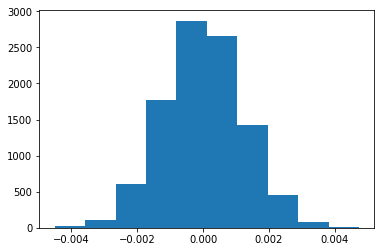

In [35]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);

In [36]:
# The differences of actual treatment group and actual control group

obs_diffs = control - treatment
obs_diffs

0.0015782389853555567

In [37]:
# create distribution under the null hypothesis

null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

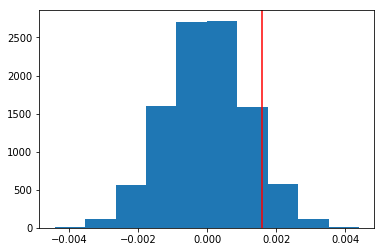

In [38]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diffs, c = 'red');

In [39]:
# compute p value

(null_vals > obs_diffs).mean()

0.0893

In [40]:
# Apply A/B testing with statistics package

import statsmodels.api as sm

convert_old = old_page_converted.mean()
convert_new = new_page_converted.mean()

n_old = n_old
n_new = n_new

In [41]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

(0.0016277709075196343, 0.49935061364895617)

In [42]:
from scipy.stats import norm

# Tell how significant the z-score is
norm.cdf(z_score)

0.5006493863510438

In [43]:
# Tell what the critical value at 95% confidence is

norm.ppf(1-(0.05/2))

1.959963984540054

In [44]:
# Logistic Regression approach

df2['intercept'] = 1

df2 = df2.join(pd.get_dummies(df2['landing_page']))
df2['ab_page'] = pd.get_dummies(df2['group']) ['treatment']

In [45]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


In [46]:
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [47]:
# Summary: Logistic Regression model  

results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:32:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [50]:
1/np.exp(-0.0674),np.exp(0.0783),np.exp(0.0469),np.exp(0.0118),np.exp(0.0175)

(1.0697232819209153,
 1.0814470441230692,
 1.048017202119183,
 1.011869894648401,
 1.0176540221507617)

#### Summary

- From above, we can tell that except the p-value of 'intercept' is less than TypeI error = 5%, other variables are exceed TypeI error = 5% which means they are not significant. In addition, their z-scores are not large enough which means they are not significant as well.
- However, we still can tell that when 'new_page' decreases one unit, the converted will increase 7%.
- When 'UK_new_page' increases one unit, the converted will increase 8.1%.
- When 'US_new_page' increases one unit, the converted will increase 4.8%.
- When 'UK' increases one unit, the converted will increase 1.2%.
- When 'US' increases one unit, the converted will increase 1.8%.